# 📑 PROYECTO: Caso Showz

## Descripción del proyecto

Showz es una empresa dedicada a la venta de entradas para eventos, como conciertos, espectáculos teatrales, festivales y otros eventos en vivo. Opera en línea y depende fuertemente del marketing digital para atraer usuarios y convertirlos en compradores.

Como parte del programa de prácticas en el departamento de analítica de Showz, se nos ha asignado la tarea de analizar el comportamiento de los usuarios y la rentabilidad de las campañas de marketing con base en los datos de los años 2017 y 2018.

## 🎯 Objetivo

- Analizar el comportamiento de los usuarios desde su primer acceso hasta la conversión.
- Evaluar la rentabilidad de las campañas de marketing.
- Calcular métricas clave como LTV, CAC, y ROMI.
- Formular recomendaciones basadas en datos para optimizar el presupuesto de marketing.

## 🗂️ Carga y revisión inicial de datos

In [6]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [7]:
# Leer el archivo CSV
df_visits = pd.read_csv('visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=[ 'End Ts', 'Start Ts']) # tambien puedo usar df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'])
df_orders = pd.read_csv('orders_log_us.csv', parse_dates=[ 'Buy Ts'])
df_cost = pd.read_csv('costs_us.csv', parse_dates=['dt'])

In [8]:
display(df_visits.head())
print()
print(df_visits.info())
# print()
# print(df_visits.describe())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None


In [9]:
display(df_orders.head())
print()
print(df_orders.info())
# print()
# print(df_visits.describe())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [10]:
display(df_cost.head())
print()
print(df_cost.info())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


## 🧑‍💻 Preprocesamiento de Datos

In [12]:
# Función para renombrar columnas
def clean_column_names(df):
    df.columns = (
        df.columns
        .str.strip()            # Quita espacios al principio/final
        .str.lower()            # Convierte a minúsculas
        .str.replace(' ', '_')  # Reemplaza espacios con guión bajo
    )
    return df

# Aplicar a los tres DataFrames
df_visits = clean_column_names(df_visits)
df_orders = clean_column_names(df_orders)
df_cost = clean_column_names(df_cost)

print("Columnas de df_visits:")
print(df_visits.columns.tolist())

print("\nColumnas de df_orders:")
print(df_orders.columns.tolist())

print("\nColumnas de df_cost:")
print(df_cost.columns.tolist())

Columnas de df_visits:
['device', 'end_ts', 'source_id', 'start_ts', 'uid']

Columnas de df_orders:
['buy_ts', 'revenue', 'uid']

Columnas de df_cost:
['source_id', 'dt', 'costs']


**Descripción de los datos**<br>

* La tabla df_visits (registros del servidor con datos sobre las visitas al sitio web)

uid: identificador único del usuario.<br>
device: dispositivo del usuario.<br>
start_ts: fecha y hora de inicio de la sesión.<br>
end_ts: fecha y hora de término de la sesión.<br>
source_id: identificador de la fuente de anuncios de la que proviene el usuario.<br>

* La tabla df_orders (datos sobre pedidos):

uid: identificador único del usuario que realiza un pedido.<br>
buy_ts: fecha y hora del pedido.<br>
revenue: el ingreso de Showz por el pedido.<br>

* La tabla df_cost (datos sobre gastos de marketing):

source_id: identificador de la fuente de anuncios.<br>
dt : fecha.<br>
costs: gastos en esta fuente de anuncios en este día.<br>

In [14]:
# Renombrar columnas en df_visits
df_visits.rename(columns={
    'uid': 'user_id',
    'end_ts': 'session_end_dt',
    'start_ts': 'session_start_dt'
}, inplace=True)

# Renombrar columnas en df_orders
df_orders.rename(columns={
    'uid': 'user_id',
    'buy_ts': 'buy_dt'
}, inplace=True)

# Imprimir nombres de columnas
print("Columnas de df_visits:")
print(df_visits.columns.tolist())

print("\nColumnas de df_orders:")
print(df_orders.columns.tolist())

print("\nColumnas de df_cost:")
print(df_cost.columns.tolist())


Columnas de df_visits:
['device', 'session_end_dt', 'source_id', 'session_start_dt', 'user_id']

Columnas de df_orders:
['buy_dt', 'revenue', 'user_id']

Columnas de df_cost:
['source_id', 'dt', 'costs']


In [15]:
# Verificar duplicados
print(df_visits.duplicated().sum())
print(df_orders.duplicated().sum())
print(df_cost.duplicated().sum())

0
0
0


## 📊Análisis Exploratorio de Datos (EDA)

### Comportamiento de usuarios

* ¿Cuántas personas lo usan cada día, semana y mes?

In [19]:
df_visits_1 = df_visits.copy() 
df_visits_1['start_year'] = df_visits_1['session_start_dt'].dt.isocalendar().year       # Año
df_visits_1['start_month'] = df_visits_1['session_start_dt'].dt.month       # Mes del año
df_visits_1['start_week'] = df_visits_1['session_start_dt'].dt.isocalendar().week # Semana 
df_visits_1['start_day'] = df_visits['session_start_dt'].dt.date         # Solo fecha sin hora
display(df_visits_1.head(5))

,device,session_end_dt,source_id,session_start_dt,user_id,start_year,start_month,start_week,start_day
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


user_id
start_year start_day          
2017       2017-06-01      605
           2017-06-02      608
           2017-06-03      445
           2017-06-04      476
           2017-06-05      820

El número promedio de usuarios por día: 908.0



<Axes: xlabel='Fecha / Dia', ylabel='Cantidad de Usuarios'>

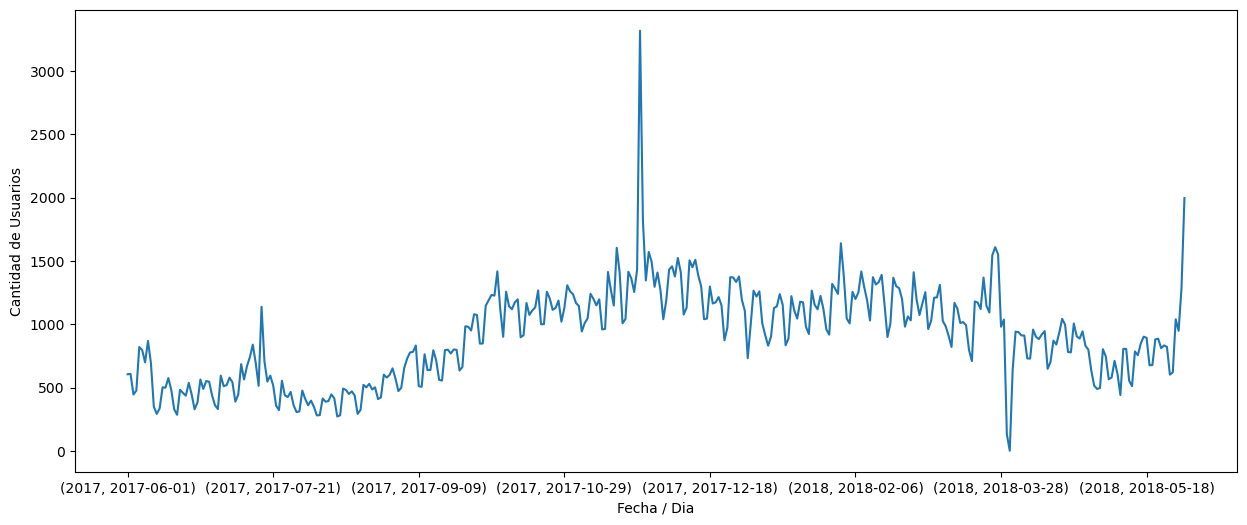

In [20]:
users_per_day = df_visits_1.groupby(['start_year','start_day']).agg({'user_id': 'nunique'}) #El resultado es un DataFrame multiíndice
display(users_per_day.head(5))
print(f"El número promedio de usuarios por día: {users_per_day['user_id'].mean().round()}")
print()
users_per_day.plot(kind='line', figsize=[15,6], xlabel="Fecha / Dia", ylabel="Cantidad de Usuarios", legend=False)

user_id
start_year start_week         
2017       22             2021
           23             4129
           24             2812
           25             2878
           26             3064

El número promedio de usuarios por semana: 5716.0



<Axes: xlabel='Año / semana', ylabel='Cantidad de Usuarios'>

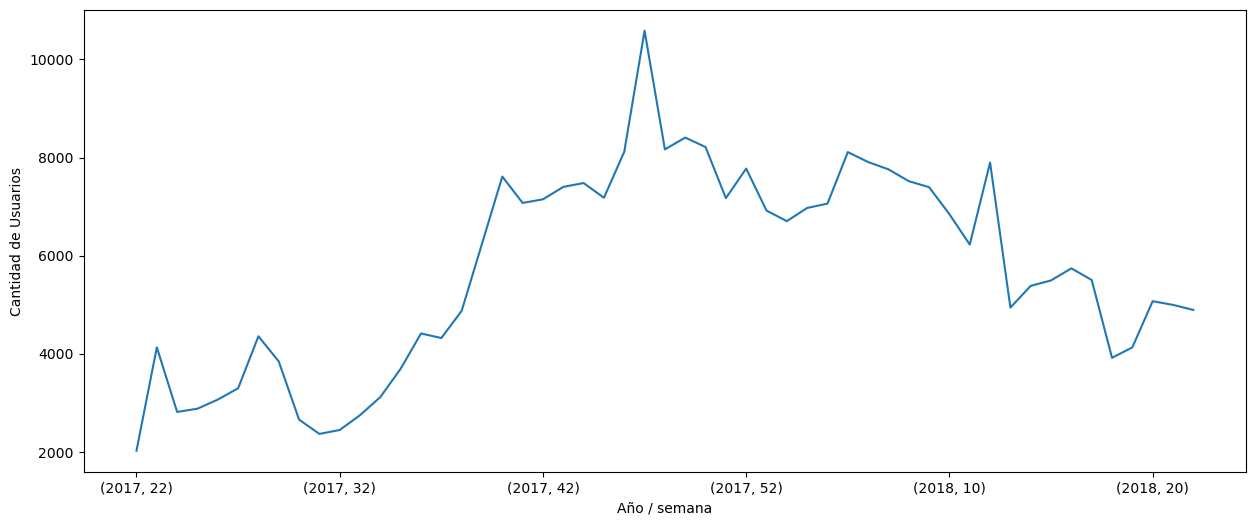

In [22]:
users_per_week = df_visits_1.groupby(['start_year','start_week']).agg({'user_id': 'nunique'}) #El resultado es un DataFrame multiíndice
display(users_per_week.head(5))
print(f"El número promedio de usuarios por semana: {users_per_week['user_id'].mean().round()}")
print()
users_per_week.plot(kind='line', figsize=[15, 6], xlabel="Año / semana", ylabel="Cantidad de Usuarios", legend=False)

                        user_id
start_year start_month         
2017       6              13259
           7              14183
           8              11631
           9              18975
           10             29692
           11             32797
           12             31557
2018       1              28716
           2              28749
           3              27473
           4              21008
           5              20701
El número promedio de usuarios por mes: 23228.0



<Axes: xlabel='Año / mes', ylabel='Cantidad de Usuarios'>

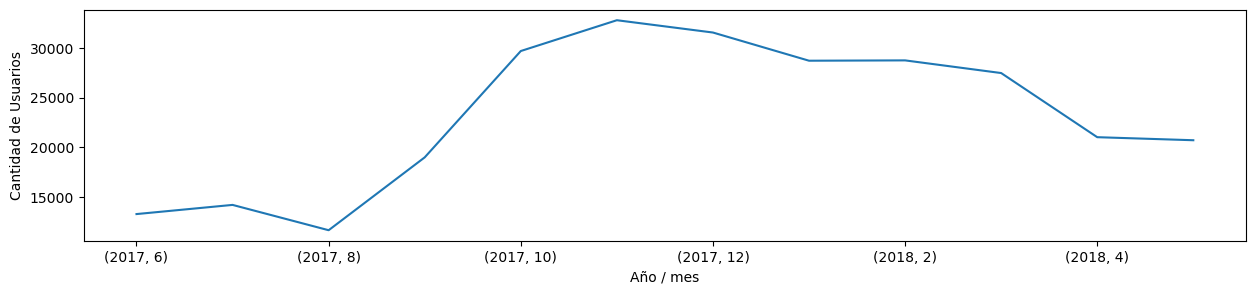

In [24]:
users_per_month = df_visits_1.groupby(['start_year','start_month']).agg({'user_id':'nunique'}) #El resultado será un DataFrame multiíndice
print(users_per_month.head(12))
print(f"El número promedio de usuarios por mes: {users_per_month['user_id'].mean().round()}")
print()
users_per_month.plot(kind='line', figsize=[15, 3], xlabel="Año / mes", ylabel="Cantidad de Usuarios", legend=False)

In [25]:
print(f"El número promedio de usuarios por día: {users_per_day['user_id'].mean().round()}")
print(f"El número promedio de usuarios por semana: {users_per_week['user_id'].mean().round()}")
print(f"El número promedio de usuarios por mes: {users_per_month['user_id'].mean().round()}")

El número promedio de usuarios por día: 908.0
El número promedio de usuarios por semana: 5716.0
El número promedio de usuarios por mes: 23228.0


**Comentario**<br> Se observa que en los meses de octubre, noviembre y diciembre de 2017 hubo mayor cntidad de usuarios en la página de Showz.

* ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

user_id
start_year start_day          
2017       2017-06-01      664
           2017-06-02      658
           2017-06-03      477
           2017-06-04      510
           2017-06-05      893

El número de sesiones por día: 987.0 sesiones


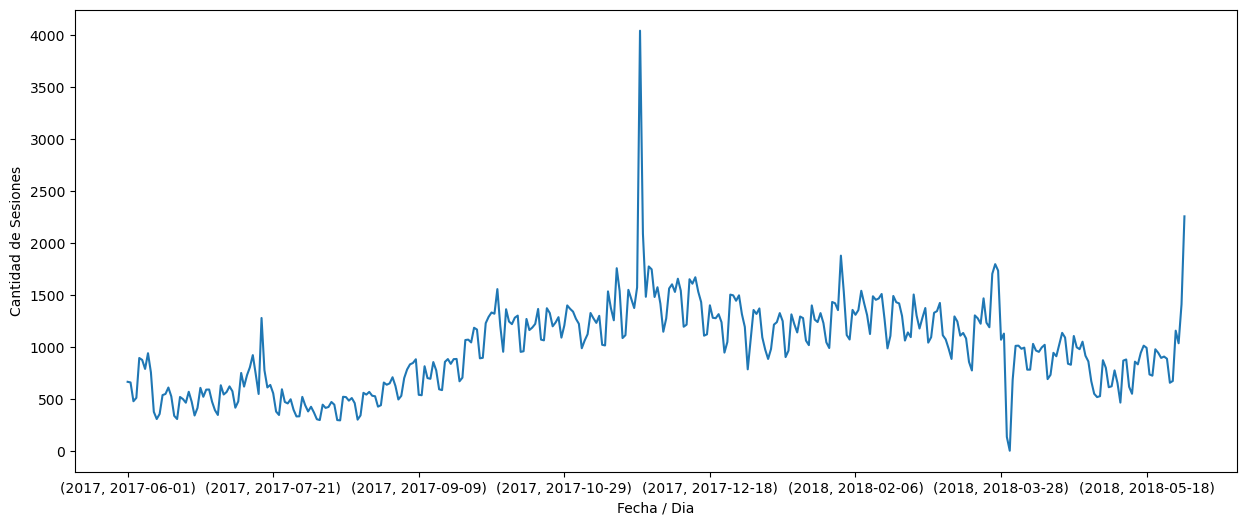

In [28]:
sessions_per_day = df_visits_1.groupby(['start_year','start_day']).agg({'user_id': 'count'}) #El resultado es un DataFrame multiíndice
display(sessions_per_day.head(5))
sessions_per_day.plot(kind='line', figsize=[15,6], xlabel="Fecha / Dia", ylabel="Cantidad de Sesiones", legend=False)
print(f"El número de sesiones por día: {sessions_per_day['user_id'].mean().round()} sesiones")

* ¿Cuál es la duración de cada sesión?

El tiempo promedio por sesión es: 643.0 segundos


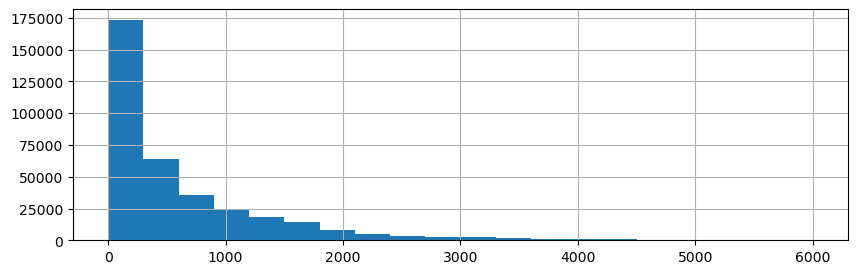

In [30]:
# Calcular la duración de la sesión
df_visits_1['session_duration'] = df_visits_1['session_end_dt'] - df_visits_1['session_start_dt'] #  El resultado es un objeto de tipo timedelta
# Duración de session en segundos
df_visits_1['session_duration_seconds'] = df_visits_1['session_duration'].dt.total_seconds() # el resultado será tipo float64
df_visits_1 = df_visits_1[['user_id','session_start_dt', 'session_end_dt', 'session_duration','session_duration_seconds']]
df_visits_1 = df_visits_1[df_visits_1['session_duration_seconds']>=0]
# Histograma de la columna 'session_duration_seconds'
df_visits_1['session_duration_seconds'].hist(bins=20, figsize=(10, 3), range=(0, 6000))
# Calcular el tiempo promedio por sesión 
print(f"El tiempo promedio por sesión es: {df_visits_1['session_duration_seconds'].mean().round()} segundos")
# display(df_visits_1['session_duration_seconds'].value_counts().reset_index().sort_values(by='index', ascending=True).head(15))

Según el histograma, la duración de las sesiones entre 0-300 segundos tiene mayor frecuencia (el pico más alto). El tiempo promedio por sesión es de 643 segundos.

In [32]:
print(f"El número de sesiones por día: {sessions_per_day['user_id'].mean().round()} sesiones")
print(f"El tiempo promedio por sesión es: {df_visits_1['session_duration_seconds'].mean().round()} segundos")

El número de sesiones por día: 987.0 sesiones
El tiempo promedio por sesión es: 643.0 segundos


  * ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [34]:
# MAU (Monthly Active Users) / Usuarios activos por mes
mau_total = users_per_month['user_id'].mean()

# DAU (Daily Active Users) - Usuarios activos por día
dau_total = users_per_day['user_id'].mean()

# WAU (Weekly Active Users) - Usuarios activos por semana
wau_total = users_per_week['user_id'].mean()

# Calcular el sticky factor de WAU (Weekly) como el porcentaje de DAU / WAU
sticky_wau = (dau_total / wau_total) * 100

# Calcular el sticky factor de MAU (Monthly) como el porcentaje de DAU / MAU
sticky_mau = (dau_total / mau_total) * 100


#Mostrar los resultados
print(f"Sticky WAU: {sticky_wau:.2f}%")
print(f"Sticky MAU: {sticky_mau:.2f}%")

Sticky WAU: 15.88%
Sticky MAU: 3.91%


**Comentario**<br>**Sticky WAU: 15.88%**<br>Este valor indica que, de los usuarios activos semanales, solo el 15.88% de ellos están activos también cada día de la semana. 

**Sticky MAU: 3.91%**<br>Este valor muestra que solo el 3.91% de los usuarios activos mensuales son también activos diariamente.

### Análisis de Comportamiento de Compra y Conversión de Usuarios

* ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [38]:
# Obtener un data frame solo con las fechas de las primeras visitas de cada usuario (por 'Uid').
first_visit = df_visits.groupby('user_id')['session_start_dt'].min() 
first_visit.name = 'first_visit_datetime'
# print(type(first_visit))
# print(first_visit)

In [39]:
# Obtener solo las fechas de las primeras ordenes de cada usuario (por 'Uid')
first_order = df_orders.groupby('user_id')['buy_dt'].min().reset_index()
# print(first_order)

# Unir las tablas de las fechas de primeras visitas y primeras ordenes (compras)
merged_tables = first_order.merge(first_visit, on='user_id')
merged_tables = merged_tables.rename(columns={'buy_dt': 'first_order_datetime'})

display(merged_tables.head(3))

,user_id,first_order_datetime,first_visit_datetime
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00


In [40]:
# Calcular la diferencia de días entre 'first_order_datetime' y 'first_visit_datetime' y agregar 'd'
merged_tables_ = merged_tables.copy()
merged_tables_['days_to_conversion'] = (merged_tables_['first_order_datetime'] - merged_tables_['first_visit_datetime']).dt.days
display(merged_tables_.head(3))

,user_id,first_order_datetime,first_visit_datetime,days_to_conversion
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0


days_to_conversion
0    26363
1     1011
2      563
3      434
4      324
Name: count, dtype: int64

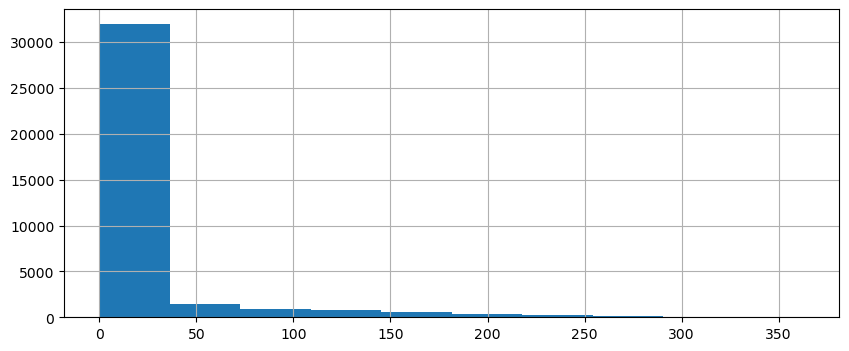

In [41]:
merged_tables_['days_to_conversion'].hist(figsize=(10, 4))
display(merged_tables_['days_to_conversion'].value_counts().head(5))

**Comentario**<br>Se observa en el histograma que la mayoría de usuarios (26,363 usuarios) compran el mismo día que se registran en la página.

In [43]:
# Crear una nueva columna (Cohort) convirtiendo la fecha de la columna first_visit_datetime a un formato de fecha
# con precisión mensual 'datetime64[M]' o .
merged_tables_['cohort'] = merged_tables_['first_visit_datetime'].values.astype('datetime64[M]') #.astype('datetime64[M]') 
# merged_tables_

In [44]:
# Crear la tabla dinámica (pivot table)
pivot_table = merged_tables_.pivot_table(
    index='cohort',  # El índice será la columna Cohort (cohortes de usuarios)
    columns='days_to_conversion',  # Las columnas serán los días que pasan desde que inician sesion por primera vez hasta la primera compra
    values='user_id',  # Queremos contar los Uid
    aggfunc='count',  # Usamos 'count' para contar los Uid
    fill_value=0  # Rellenar los valores faltantes con 0
)

In [45]:
# Mostrar solo las primeras 12 columnas
pivot_table = pivot_table.iloc[:, :12]
display(pivot_table)

days_to_conversion,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,1804,55,27,34,21,15,16,10,14,6,6,3
2017-07-01,1526,59,37,19,20,17,13,12,11,5,7,5
2017-08-01,1097,27,14,12,16,9,12,7,5,4,3,3
2017-09-01,1966,71,39,40,30,24,35,17,17,14,13,10
2017-10-01,3302,118,70,58,31,37,32,27,20,15,16,11
2017-11-01,2866,145,73,65,42,33,33,24,25,23,25,26
2017-12-01,2992,125,68,61,41,37,26,30,21,18,13,11
2018-01-01,2326,94,53,38,29,29,25,19,18,15,15,6
2018-02-01,2482,95,74,40,40,25,18,35,18,17,13,6


<Axes: xlabel='days_to_conversion', ylabel='cohort'>

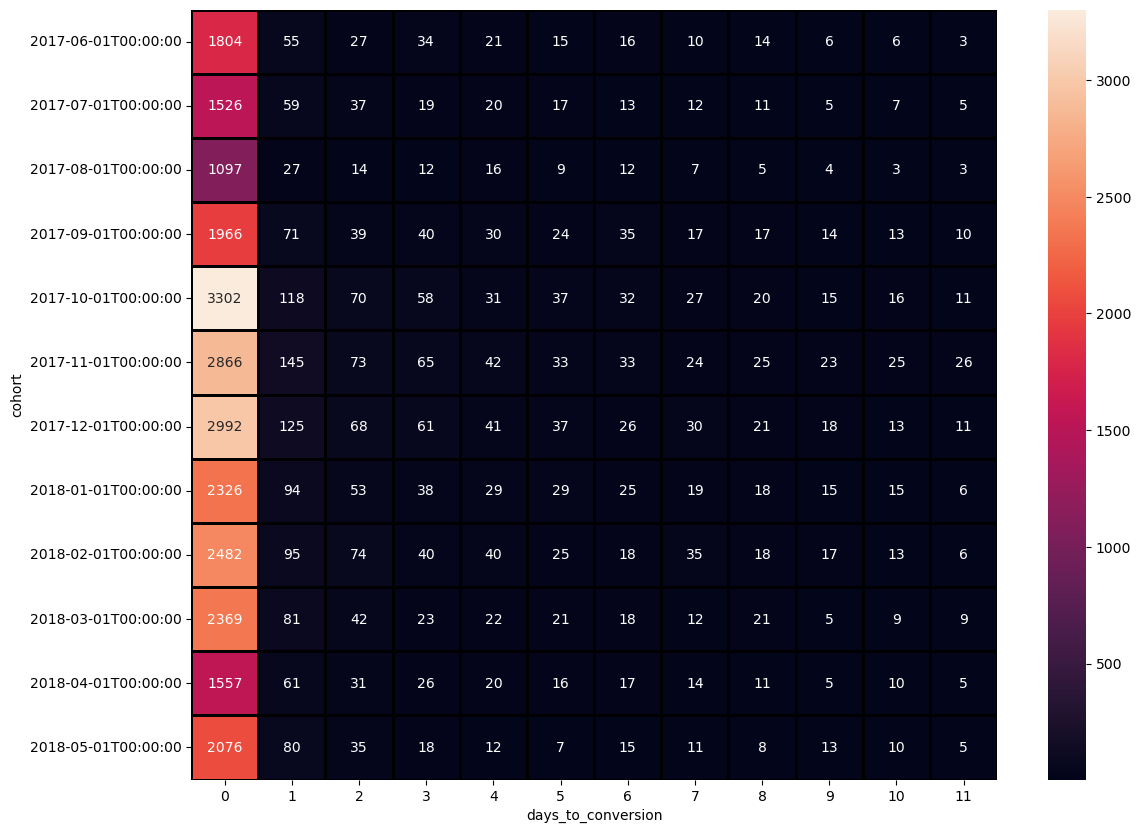

In [46]:
plt.figure(figsize=(13, 10)) # Establece el tamaño de la figura
sns.heatmap(
    pivot_table,
    annot=True,                # Mostrar los valores dentro de las celdas
    fmt=".0f",                 # Formato de los números (2 decimales)
    linewidths=1,              # Ancho de las líneas de separación (1 píxel)
    linecolor='black',         # Color de las líneas de separación (negro)
)

**Comentario**<br>Se observa que la mayor cantidad de usuarios convertidos el mismo día que se registraron en la página son en los meses de octubre, noviembre, y diciembre de 2017.

In [48]:
# Paso 1: Obtener el total de usuarios por cohorte
total_users_by_cohort = pivot_table.sum(axis=1)  # Sumar por fila (cohorte)

# Paso 2: Calcular el porcentaje de conversión para cada día
conversion_percentage = (pivot_table.div(total_users_by_cohort, axis=0) * 100).round(2)

# Mostrar el resultado
print(conversion_percentage)

days_to_conversion     0     1     2     3     4     5     6     7     8   \
cohort                                                                      
2017-06-01          89.71  2.73  1.34  1.69  1.04  0.75  0.80  0.50  0.70   
2017-07-01          88.16  3.41  2.14  1.10  1.16  0.98  0.75  0.69  0.64   
2017-08-01          90.74  2.23  1.16  0.99  1.32  0.74  0.99  0.58  0.41   
2017-09-01          86.38  3.12  1.71  1.76  1.32  1.05  1.54  0.75  0.75   
2017-10-01          88.36  3.16  1.87  1.55  0.83  0.99  0.86  0.72  0.54   
2017-11-01          84.79  4.29  2.16  1.92  1.24  0.98  0.98  0.71  0.74   
2017-12-01          86.90  3.63  1.98  1.77  1.19  1.07  0.76  0.87  0.61   
2018-01-01          87.21  3.52  1.99  1.42  1.09  1.09  0.94  0.71  0.67   
2018-02-01          86.69  3.32  2.58  1.40  1.40  0.87  0.63  1.22  0.63   
2018-03-01          90.01  3.08  1.60  0.87  0.84  0.80  0.68  0.46  0.80   
2018-04-01          87.82  3.44  1.75  1.47  1.13  0.90  0.96  0.79  0.62   

In [49]:
# Porcentaje mensual promedio de conversión
# Calcular el promedio de cada columna (de 0 a 11 días de conversión)
conversion_percentage_mean = conversion_percentage.mean(axis=0)

# Mostrar el resultado
print(conversion_percentage_mean)

days_to_conversion
0     88.119167
1      3.285000
2      1.817500
3      1.394167
4      1.090000
5      0.877500
6      0.879167
7      0.706667
8      0.621667
9      0.444167
10     0.451667
11     0.315000
dtype: float64


**Comentario** En promedio mensual, el 88% de los usuarios de cada cohort se convierten el mismo día que se registran en la página.

* ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [52]:
# Hacer una copia de df_orders
orders_within_period = df_orders.copy()

# convertir la fecha de la columna Buy Ts a un formato de fecha con precisión mensual 'datetime64[M]'.
orders_within_period['order_month'] = orders_within_period['buy_dt'].values.astype('datetime64[M]') 

# Agrupar por mes y hallar la suma de Revenue y cantidad de orders por mes
orders_within_period_1 = orders_within_period.groupby('order_month').agg({
    'user_id': ('count'),  # Contamos el número de Uid (órdenes)
    'revenue': ('sum')  # Sumamos el Revenue
})

# Renombramos las columnas para que sean más descriptivas
orders_within_period_1 = orders_within_period_1.rename(columns={
    'user_id': 'total_order',    # Renombramos 'Uid' a 'total_orders'
    'revenue': 'total_revenue' # Renombramos 'Revenue' a 'total_revenue'
})

display(orders_within_period_1)

,total_order,total_revenue
order_month,,
2017-06-01,2354,9557.49
2017-07-01,2363,12539.47
2017-08-01,1807,8758.78
2017-09-01,3387,18345.51
2017-10-01,5679,27987.70
2017-11-01,5659,27069.93
2017-12-01,6218,36388.60
2018-01-01,4721,19417.13
2018-02-01,5281,25560.54


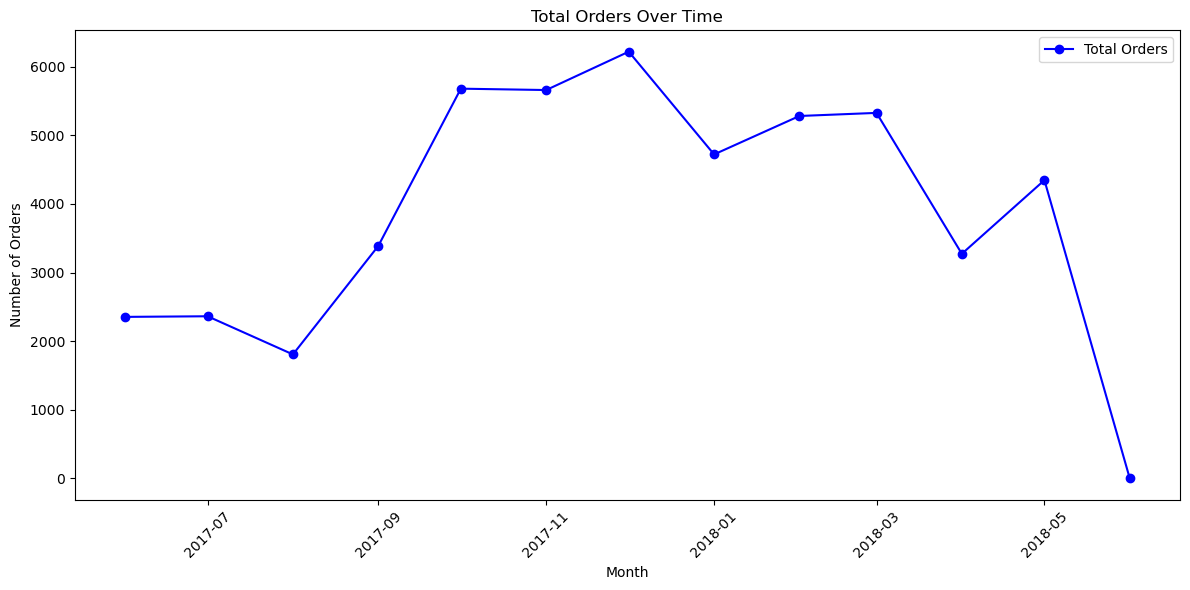

La cantidad promedio de ordenes por mes es: 3878.08


In [53]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))

# Graficar el total de órdenes
plt.plot(orders_within_period_1.index, orders_within_period_1['total_order'], label='Total Orders', marker='o', color='blue')

# Títulos y etiquetas
plt.title('Total Orders Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

# Rotar las etiquetas del eje X para que no se solapen
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

print("La cantidad promedio de ordenes por mes es:", orders_within_period_1['total_order'].mean().round(2))

**Comentario**<br>Se observa que la mayor cantidad de ordenes se realizó en Octubre (5679 órdenes), Noviembre(5659 órdenes) y Diciembre(6218 órdenes) de 2017. Y la cantidad promedio de ordenes por mes es 3878.

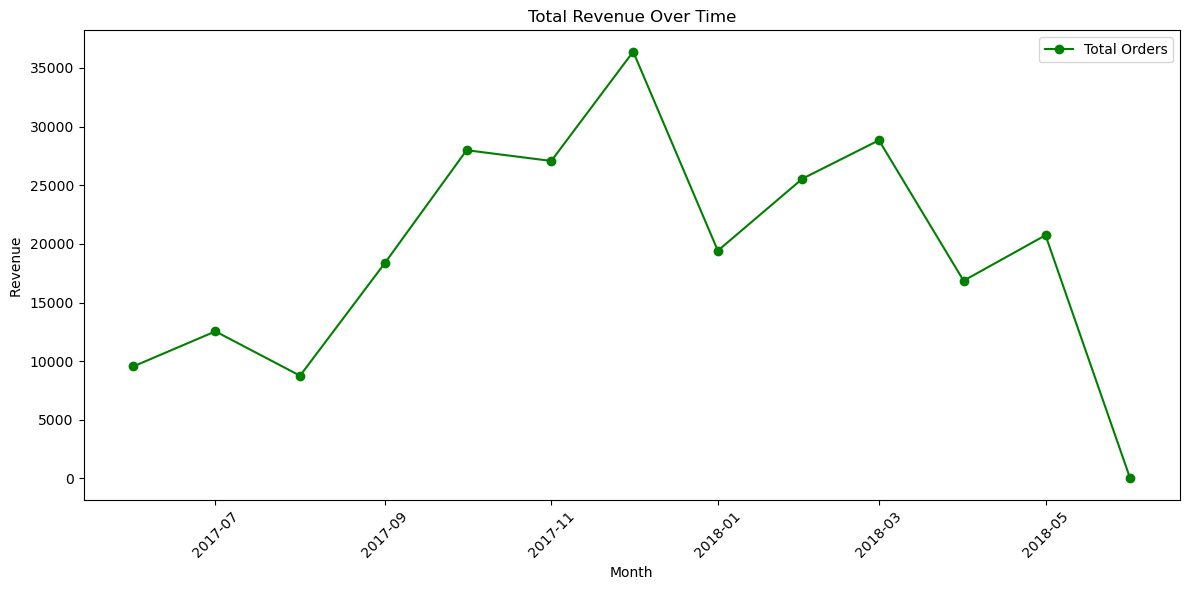

La promedio de ingreso por mes es: 19389.02


In [55]:
# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))

# Graficar el total de órdenes
plt.plot(orders_within_period_1.index, orders_within_period_1['total_revenue'], label='Total Orders', marker='o', color='green')

# Títulos y etiquetas
plt.title('Total Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue ')

# Rotar las etiquetas del eje X para que no se solapen
plt.xticks(rotation=45)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

print("La promedio de ingreso por mes es:", orders_within_period_1['total_revenue'].mean().round(2))

**Comentario**<br>Se observa que los meses con mayor ingresos son octubre 2017 (`$` 27987.70) , noviembre 2017 (`$` 27069.93) , diciembre de 2017 (`$` 36388.60 )y marzo  2018 (`$` 28834.59). 

* ¿Cuál es el tamaño promedio de compra?

In [58]:
orders_within_period_1['revenue_per_order'] = (orders_within_period_1['total_revenue']/orders_within_period_1['total_order']).round(2)
display(orders_within_period_1)
print('El ingreso promedio por compra es: ',orders_within_period_1['revenue_per_order'].mean().round(2))

,total_order,total_revenue,revenue_per_order
order_month,,,
2017-06-01,2354,9557.49,4.06
2017-07-01,2363,12539.47,5.31
2017-08-01,1807,8758.78,4.85
2017-09-01,3387,18345.51,5.42
2017-10-01,5679,27987.70,4.93
2017-11-01,5659,27069.93,4.78
2017-12-01,6218,36388.60,5.85
2018-01-01,4721,19417.13,4.11
2018-02-01,5281,25560.54,4.84


El ingreso promedio por compra es:  4.84


**Comentario**<br>En promedio, cada compra realizada generó un ingreso de `$` 4.84.

* ¿Cuánto dinero traen? (LTV)

In [61]:
df_orders_2 = df_orders.copy()

In [62]:
# Unir la tablade ordenes con la table de fechas de primeras visita a la página
merged_tables_2 = df_orders_2.merge(first_visit, on='user_id')
# convertir la fecha de la columna first_visit_datetime a un formato de fecha con precisión mensual 'datetime64[M]'.
merged_tables_2['first_visit_month']= merged_tables_2['first_visit_datetime'].values.astype('datetime64[M]')
# convertir la fecha de la columna Buy Ts a un formato de fecha con precisión mensual 'datetime64[M]'.
merged_tables_2['order_month']= merged_tables_2['buy_dt'].values.astype('datetime64[M]')
merged_tables_2

,buy_dt,revenue,user_id,first_visit_datetime,first_visit_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,2017-10-01,2018-05-01


In [63]:
# Contar cuantos usuarios hay en cada cohorte 
cohort_sizes = (
    merged_tables_2.groupby('first_visit_month')
    .agg({'user_id': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_visit_month', 'n_buyers']

In [64]:
# Calcular la diferencia en meses entre el mes de primera visita y el mes de primera compra de usuario
merged_tables_2['age'] = (
    merged_tables_2['order_month'].dt.to_period('M') - merged_tables_2['first_visit_month'].dt.to_period('M')
).apply(lambda x: x.n)

merged_tables_2['age'] = merged_tables_2['age'].round().astype('int')

# Crear la tabla Revenue 
revenue = merged_tables_2.groupby(['first_visit_month','age']).agg({'revenue':'sum'}).reset_index()  
display(revenue)

,first_visit_month,age,revenue
0,2017-06-01,0,9557.49
1,2017-06-01,1,2664.58
2,2017-06-01,2,1464.69
3,2017-06-01,3,3882.09
4,2017-06-01,4,3940.59
...,...,...,...
74,2018-03-01,2,774.77
75,2018-04-01,0,8043.82
76,2018-04-01,1,1838.73
77,2018-05-01,0,10368.11


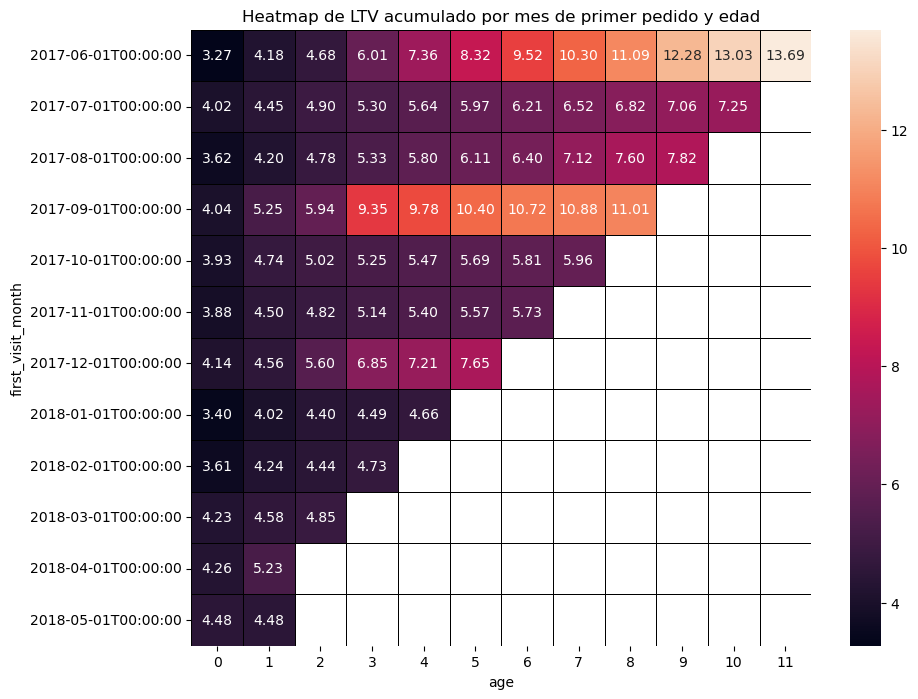

In [65]:
# Fusionar la tabla de revenue con la tabla de cohort_sizes
report = pd.merge(revenue, cohort_sizes,on='first_visit_month')

# margin_rate = ¿?
report['gp'] = report['revenue'] #* margin_rate

report['ltv'] = report['gp']/report['n_buyers']
# report['Revenue'].sum()

result = report.pivot_table(index='first_visit_month',columns='age',values='ltv',aggfunc='mean').cumsum(axis=1).round(2)# 

result = result.fillna(np.nan)

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(result, annot=True, fmt=".2f", linewidths=0.5, linecolor='black')

# Mostrar el gráfico
plt.title('Heatmap de LTV acumulado por mes de primer pedido y edad')
plt.show()

**Comentario**<Br>Se observa que para la cohorte que ingresó en junio de 2017 (2017-06-01), el LTV acumulado de los usuarios aumentó mes a mes. Inicialmente, el LTV fue 3.27 en el mes 0 (es decir, cuando hicieron su primera visita). Después, siguió creciendo hasta alcanzar 13.69 en el mes 11.<br> Para la cohorte que ingresó en setiembre de 2017 (2017-09-01) y diciembre de 2017 (2017-12-01), el LTV acumulado de los usuarios aumentó más que los otros meses del año, es decir, los usuarios de esas cohorts están aportando más dinero a la empresa.<br>A medida que pasan los meses (en la columna "age"), el LTV acumulado generalmente aumenta. Esto es esperado, ya que los usuarios que entran por primera vez tienden a realizar compras adicionales con el tiempo, lo que incrementa el valor acumulado.

### Análisis de Inversión en Marketing

* ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [69]:
df_cost_1 = df_cost.copy()
df_cost_1['month'] = df_cost_1['dt'].values.astype('datetime64[M]')
total_cost_per_source = pd.pivot_table(df_cost_1,index ='month' , columns ='source_id', values='costs', aggfunc='sum', fill_value=0)
# total_cost_per_source

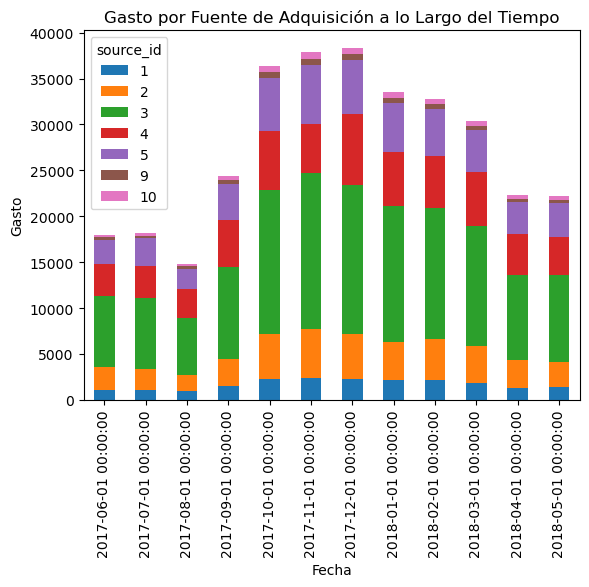

In [70]:
total_cost_per_source.plot(kind='bar', stacked=True)
plt.title('Gasto por Fuente de Adquisición a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Gasto')
plt.show()

**Comentario**<br>Los meses en los que se gastó más en marketing son los meses de octubre, noviembre y diciembre de 2017.

In [72]:
df_cost_per_source = df_cost_1.groupby('source_id')['costs'].sum().reset_index()
df_cost_per_source = df_cost_per_source.sort_values(by='costs', ascending=False)
display(df_cost_per_source)

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


**Comentario**<br>Tanto en el gráficos de barras apiladas como en la tabla anterior, se observa que el Source 3 es en el que se invierte más dinero.

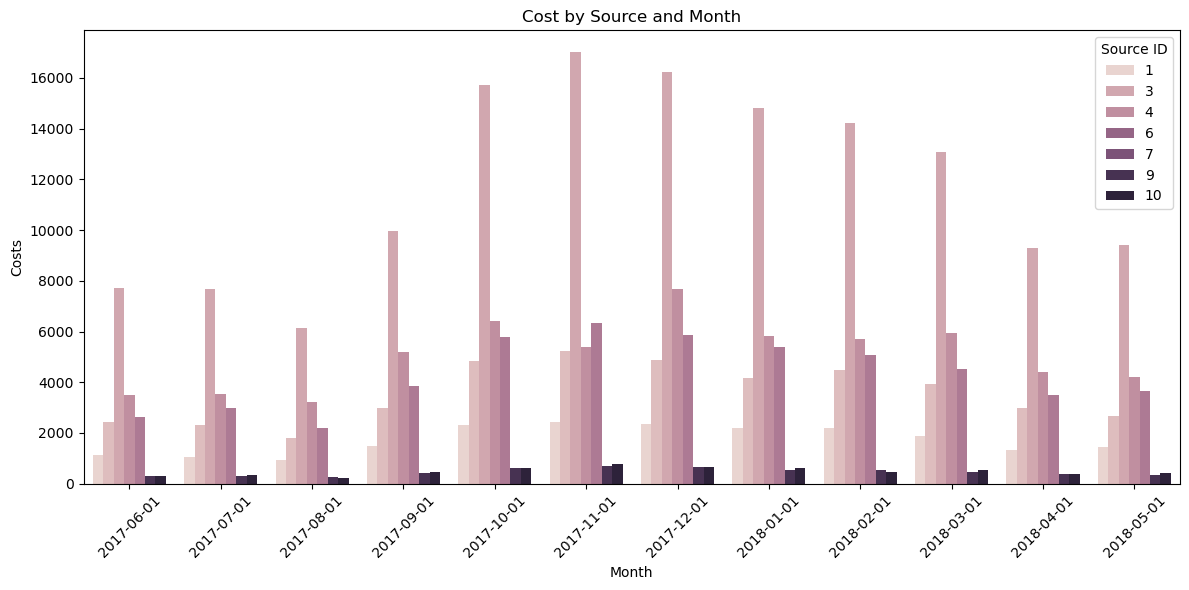

In [74]:
# Crear el gráfico de barras
df_cost_per_source_ = df_cost_1.groupby(['source_id','month'])['costs'].sum().reset_index()
plt.figure(figsize=(12, 6))

# Utilizar seaborn para crear el gráfico de barras
sns.barplot(x='month', y='costs', hue='source_id', data=df_cost_per_source_)

# Ajustes del gráfico
plt.title('Cost by Source and Month')
plt.xlabel('Month')
plt.ylabel('Costs')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor visibilidad
plt.legend(title='Source ID', loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Comentario**<br>Se observa que en todos los meses se gasta más en marketing del source 3 , es sigificativamente mayor que los demás sources.Después siguen los sources 4, 5, y 2.

*  2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [77]:
# Este código selecciona las columnas 'Uid', 'Start Ts' y 'Source Id' de df_visits, las ordena por la fecha 'Start Ts' 
# de forma ascendente, y luego agrupa por 'Uid' para obtener la primera fila de cada grupo, es decir, la primera visita de 
# cada usuario.
first_visit_users = (
    df_visits[['user_id', 'session_start_dt', 'source_id']]
    .sort_values(by='session_start_dt',ascending=True)
    .groupby('user_id',as_index=False)
    .first()
)
first_visit_users['first_visit_date'] = first_visit_users['session_start_dt'].dt.date
first_visit_users.head(3)

,user_id,session_start_dt,source_id,first_visit_date
0,11863502262781,2018-03-01 17:27:00,3,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2,2018-02-06
2,297729379853735,2017-06-07 18:47:00,3,2017-06-07


In [78]:
# Selecciona las columnas 'Uid' y 'Buy Ts' de df_orders, las ordena por 'Buy Ts' de forma ascendente y 
# luego obtiene la primera compra ('Buy Ts') de cada usuario ('Uid').
first_order_users = (
    df_orders[['user_id', 'buy_dt']]
    .sort_values(by='buy_dt',ascending=True)
    .groupby('user_id',as_index=False)
    .first()
)
first_order_users['first_order_date'] = first_order_users['buy_dt'].dt.date
first_order_users.head(3)

,user_id,buy_dt,first_order_date
0,313578113262317,2018-01-03 21:51:00,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-03
2,2429014661409475,2017-10-11 18:33:00,2017-10-11


In [79]:
# Primera visita y primera compra de usuarios
first_data_users = pd.merge(first_visit_users[['user_id','source_id','first_visit_date']],
                            first_order_users[['user_id','first_order_date']],  
                            on='user_id' ,how='right'
                           )

# Convertir las columnas 'visit_date' y 'order_date' a datetime)
first_data_users['first_visit_date'] = pd.to_datetime(first_data_users['first_visit_date'], errors='coerce')
first_data_users['first_order_date'] = pd.to_datetime(first_data_users['first_order_date'], errors='coerce')

first_data_users.head(3)

,user_id,source_id,first_visit_date,first_order_date
0,313578113262317,2,2017-09-18,2018-01-03
1,1575281904278712,10,2017-06-03,2017-06-03
2,2429014661409475,3,2017-10-11,2017-10-11


In [80]:
# Agrupar por fuente y fecha para contar cantidad diferente de compradores
first_date_buyers =(
    first_data_users 
    .groupby(['source_id','first_visit_date']) #dia ingresaron la primera vez
    .agg(n_buyers=('user_id','nunique'))
    .reset_index()
) 
first_date_buyers.head(3)

,source_id,first_visit_date,n_buyers
0,1,2017-06-01,24
1,1,2017-06-02,12
2,1,2017-06-03,8


In [81]:
df_cost_2 = df_cost.copy()

In [82]:
# Unir costos por fecha y fuente
cac_buyers = pd.merge(first_date_buyers,
                      df_cost_2, 
                      left_on=['source_id','first_visit_date'],
                      right_on=['source_id','dt'], how='right'
                     )

cac_buyers['cac_diario'] = cac_buyers['costs'] / cac_buyers['n_buyers']

# Ver los primeros registros
cac_buyers.head(3)

,source_id,first_visit_date,n_buyers,dt,costs,cac_diario
0,1,2017-06-01,24.0,2017-06-01,75.20,3.133333
1,1,2017-06-02,12.0,2017-06-02,62.25,5.187500
2,1,2017-06-03,8.0,2017-06-03,36.53,4.566250


In [83]:
# calcular promedio de cac por fuente
cac_daily_mean = cac_buyers.groupby('source_id')['cac_diario'].mean().reset_index()

# Ordenar el DataFrame por la columna 'cac_diario' de menor a mayor
cac_daily_mean_sorted = cac_daily_mean.sort_values(by='cac_diario', ascending=True)

# Mostrar el DataFrame ordenado
display(cac_daily_mean_sorted)

,source_id,cac_diario
6,10,6.553861
3,4,6.802483
5,9,7.152904
4,5,8.596789
0,1,9.118983
2,3,15.118899
1,2,17.002963


**Comentario**<br>Fuentes más eficientes: Las fuentes con CAC más bajo (fuentes 4, 9 y 10) parecen ser más eficientes en cuanto a la adquisición de clientes, lo que sugiere que podrían ser más rentables para enfocar los esfuerzos de marketing.<br>Fuentes menos eficientes: La fuente 2 tiene el CAC más alto (17.00), lo que indica que esta fuente podría ser menos rentable o requiere optimización para mejorar la eficiencia en la adquisición de clientes.

 * ¿Cuán rentables eran las inversiones? (ROMI)

In [86]:
df_orders_2 = df_orders.copy()
df_visits_2 = df_visits.copy()
df_cost_3 = df_cost.copy()

In [87]:
total_datos = len(df_orders_2['user_id'])
# total_datos
df_cost_3['month_cost'] = df_cost_3['dt'].values.astype('datetime64[M]')
# df_cost_3

In [88]:
# Extraer las fechas de las primeras visitas de los usuarios
first_visit_users_2 = (
    df_visits_2.sort_values(by='session_start_dt', ascending=True)
    .groupby('user_id', as_index=False)
    .first()
)
# display(first_visit_users_2.head(3)) 

In [89]:
# Unir tablas de first_visit_users_2 con df_orders_2 ( para que se identifique los source y fecha de primera visita)
df_orders_visits= df_orders_2.merge(first_visit_users_2, on=['user_id'], how="left")
df_orders_visits = df_orders_visits[['user_id', 'source_id', 'buy_dt', 'session_start_dt', 'revenue']]
df_orders_visits['order_month'] = df_orders_visits['buy_dt'].values.astype('datetime64[M]')
df_orders_visits['first_visit_month'] = df_orders_visits['session_start_dt'].values.astype('datetime64[M]')
# display(df_orders_visits.head(3))

In [90]:
# Extraer las fechas de las primeras compras 
first_orders_2 = df_orders_2.groupby('user_id').agg({'buy_dt': 'min'}).reset_index()
first_orders_2['buy_dt'] = first_orders_2['buy_dt'].values.astype('datetime64[M]') 
first_orders_2.rename(columns={'buy_dt': 'first_order_month'}, inplace=True)
# display(first_orders_2.head(3))

In [91]:
orders_visits_ = pd.merge(df_orders_visits,first_orders_2, on='user_id', how='left')
display(orders_visits_.head(3))
# display(orders_visits_.info())

,user_id,source_id,buy_dt,session_start_dt,revenue,order_month,first_visit_month,first_order_month
0,10329302124590727494,1,2017-06-01 00:10:00,2017-06-01 00:09:00,17.00,2017-06-01,2017-06-01,2017-06-01
1,11627257723692907447,2,2017-06-01 00:25:00,2017-06-01 00:14:00,0.55,2017-06-01,2017-06-01,2017-06-01
2,17903680561304213844,2,2017-06-01 00:27:00,2017-06-01 00:25:00,0.37,2017-06-01,2017-06-01,2017-06-01


In [92]:
def calcular_romi_por_source(source_id, orders_visits_, df_cost_3):
    # Filtrar los datos por el source_id
    orders_visits_source = orders_visits_[orders_visits_['source_id'] == source_id]
    df_cost_source = df_cost_3[df_cost_3['source_id'] == source_id]
    
    # Calcular el tamaño de cada cohorte (usuarios únicos por first_visit_month)
    cohort_size = orders_visits_source.groupby('first_visit_month').agg({'user_id': 'nunique'}).reset_index()
    cohort_size.columns = ['first_visit_month', 'n_unique_buyers']

    # Calcular el revenue por cohorte y mes (sumar todos los revenue de las ordenes)
    revenue_per_month = orders_visits_source.groupby(['first_visit_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()

    # Calcular la edad (diferencia entre first_visit_month y order_month en meses)
    revenue_per_month['age'] = (revenue_per_month['order_month'].dt.to_period('M')- revenue_per_month['first_visit_month'].dt.to_period('M')).apply(lambda x: x.n)
    revenue_per_month['age'] = revenue_per_month['age'].round().astype('int')
    
    # Obtener el costo mensual por source_id
    cost_per_month = df_cost_source.groupby('month_cost')['costs'].sum().reset_index()
    
    # Unir revenue y costos
    revenue_with_costs = pd.merge(revenue_per_month, cost_per_month, left_on='first_visit_month', right_on='month_cost')

    # Unir el tamaño de la cohorte con el revenue y el costo
    result = pd.merge(revenue_with_costs, cohort_size, left_on='first_visit_month', right_on='first_visit_month', how='left')

    # Calcular el LTV (revenue / tamaño de la cohorte)
    result['ltv'] = result['revenue'] / result['n_unique_buyers']

    # Calcular el CAC (costos / tamaño de la cohorte)
    result['cac'] = result['costs'] / result['n_unique_buyers']

    # Calcular el ROMI (ltv / cac)
    result['romi'] = result['ltv'] / result['cac']
    
    # Crear la tabla pivote
    pivot_table = result.pivot_table(values=['romi'], 
                                     index=['first_visit_month'], 
                                     columns=['age'], 
                                     aggfunc='mean').round(2)
    
    pivot_table = pivot_table.cumsum(axis=1).round(2)
    pivot_table = pivot_table.fillna('')
    return pivot_table
      
source_id = 1  # Definir el source_id
pivot_result = calcular_romi_por_source(source_id, orders_visits_, df_cost_3)

# Mostrar la tabla pivote
display(pivot_result)

romi                                                        \
age                  0     1     2     3     4     5     6     7     8     9    
first_visit_month                                                               
2017-06-01         1.22  1.81  2.42  3.85  4.79  5.32  5.92   6.8  7.33  7.76   
2017-07-01         0.86  0.98  1.18  1.29  1.38  1.46  1.51  1.65  1.77  2.02   
2017-08-01         0.66  0.79  0.92  1.02  1.09  1.15  1.15  2.09  2.63  2.75   
2017-09-01         0.75  1.04  1.19  1.38  1.49  1.57  1.59   1.6  1.61         
2017-10-01         0.82  1.05  1.13  1.21  1.27   1.3  1.35  1.42               
2017-11-01         0.80  0.84  0.88   0.9  0.96  0.97   1.0                     
2017-12-01         0.59  0.65  0.71  0.84  0.85  0.91                           
2018-01-01         0.40  0.44  0.46  0.47  0.48                                 
2018-02-01         0.49  0.63  0.64  0.68                                       
2018-03-01         0.78  0.81  0.86                                             
2018-04-01         0.58  0.62                                                   
2018-05-01         0.72                                                         

                              
age                  10   11  
first_visit_month             
2017-06-01         8.33  8.8  
2017-07-01         2.19       
2017-08-01                    
2017-09-01                    
2017-10-01                    
2017-11-01                    
2017-12-01                    
2018-01-01                    
2018-02-01                    
2018-03-01                    
2018-04-01                    
2018-05-01

**Comentario**<br>Los usuarios que visitaron el sitio por primera vez en junio de 2017 tuvieron un ROMI positivo desde el primer mes, y el ROMI continuó aumentando con el tiempo. Se observa que los usuarios de las primeras cohorts al tercer mes ya tenían un romi por encima de 1, pero conforme pasa el tiempo los cohorts demoran más en tener un retorno de inversión.

In [94]:
source_id = 2  # Definir el source_id
pivot_result = calcular_romi_por_source(source_id, orders_visits_, df_cost_3)

# Mostrar la tabla pivote
display(pivot_result)

romi                                                        \
age                  0     1     2     3     4     5     6     7     8     9    
first_visit_month                                                               
2017-06-01         0.43  0.59  0.63  1.04   1.5  1.67  1.98  2.23  2.46  2.82   
2017-07-01         0.63  0.76  0.81  0.88  0.98  1.09  1.14  1.17  1.21  1.23   
2017-08-01         0.30  0.35  0.37  0.42  0.45  0.48  0.51  0.53  0.57  0.59   
2017-09-01         0.41  0.93  1.14  1.19  1.26  1.32  1.36  1.36  1.37         
2017-10-01         0.51  0.82  0.86   0.9  0.93  0.97  0.98  0.99               
2017-11-01         0.33  0.43  0.52  0.63  0.68  0.72  0.75                     
2017-12-01         0.56  0.65  1.35   2.2  2.42  2.66                           
2018-01-01         0.22  0.31  0.44  0.46  0.48                                 
2018-02-01         0.26  0.35  0.38   0.4                                       
2018-03-01         0.32  0.39   0.5                                             
2018-04-01         0.30  0.37                                                   
2018-05-01         0.92                                                         

                               
age                  10    11  
first_visit_month              
2017-06-01         3.05  3.21  
2017-07-01         1.27        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

**Comentario**<br>Para el caso de los usuarios que vienen del Source 2,  el romi de los diferente cohorts no tiene un patron de coomportamiento estable, los romi están variando , en algunos cohorts incluso en el age 2 ya recuperan inversion (romi > 1) y en otras ni siquiera pasando más de 6 meses llegan a superar 1.

In [96]:
source_id = 3  # Definir el source_id
pivot_result = calcular_romi_por_source(source_id, orders_visits_, df_cost_3)

# Mostrar la tabla pivote
display(pivot_result)

romi                                                        \
age                  0     1     2     3     4     5     6     7     8     9    
first_visit_month                                                               
2017-06-01         0.36  0.45  0.48  0.53  0.59  0.64  0.67  0.69  0.71  0.73   
2017-07-01         0.32  0.34  0.37  0.41  0.42  0.44  0.46  0.49  0.51  0.52   
2017-08-01         0.26  0.29  0.32  0.35  0.37  0.38  0.39   0.4  0.41  0.42   
2017-09-01         0.39  0.46  0.51  0.53  0.56  0.58  0.62  0.63  0.64         
2017-10-01         0.28  0.33  0.35  0.36  0.38   0.4  0.41  0.42               
2017-11-01         0.27  0.31  0.33  0.35  0.37  0.38  0.39                     
2017-12-01         0.28  0.31  0.32  0.33  0.34  0.35                           
2018-01-01         0.21  0.24  0.26  0.27  0.29                                 
2018-02-01         0.22  0.26  0.27   0.3                                       
2018-03-01         0.22  0.24  0.25                                             
2018-04-01         0.23  0.35                                                   
2018-05-01         0.23                                                         

                               
age                  10    11  
first_visit_month              
2017-06-01         0.75  0.77  
2017-07-01         0.53        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

**Comentario**<br>El hecho de que el ROMI no supere 1 en ninguna cohort puede indicar que la estrategia de marketing necesita ser optimizada. La empresa podría estar dirigiendo esfuerzos hacia este source 3 y no estar generando el suficiente valor de los usuarios adquiridos.

In [98]:
source_id = 4  # Definir el source_id
pivot_result = calcular_romi_por_source(source_id, orders_visits_, df_cost_3)

# Mostrar la tabla pivote
display(pivot_result)

romi                                                        \
age                  0     1     2     3     4     5     6     7     8     9    
first_visit_month                                                               
2017-06-01         0.56  0.65  0.69  0.81  1.02  1.35  1.72  1.79  1.97  2.32   
2017-07-01         0.72  0.78  0.82  0.88  0.93  0.97  1.01  1.06  1.11  1.14   
2017-08-01         0.46  0.51  0.54   0.6  0.62  0.64  0.68   0.7  0.71  0.72   
2017-09-01         0.45  0.55  0.61  0.65  0.67   0.7  0.73  0.74  0.76         
2017-10-01         0.69  0.76  0.82  0.86  0.89  0.93  0.96  0.99               
2017-11-01         0.90  1.07  1.12  1.17  1.22  1.26  1.29                     
2017-12-01         0.59  0.63  0.66  0.69  0.71  0.73                           
2018-01-01         0.53  0.62  0.65  0.66  0.67                                 
2018-02-01         0.59  0.67  0.72  0.75                                       
2018-03-01         0.64  0.69   0.7                                             
2018-04-01         0.57  0.64                                                   
2018-05-01         0.60  0.60                                                   

                               
age                  10    11  
first_visit_month              
2017-06-01         2.53  2.75  
2017-07-01         1.15        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

**Comentario** Los dos primeros cohorts de junio y julio 2017 llegaron a alcanzar un romi mayor a 1 pero recién en el age 10 y 11 ,esto indica que la empresa no está viendo un retorno inmediato de la inversión en marketing. En lugar de generar beneficios rápidamente, la rentabilidad solo se materializa después de un largo período de tiempo.

In [100]:
source_id = 5  # Definir el source_id
pivot_result = calcular_romi_por_source(source_id, orders_visits_, df_cost_3)

# Mostrar la tabla pivote
display(pivot_result)

romi                                                        \
age                  0     1     2     3     4     5     6     7     8     9    
first_visit_month                                                               
2017-06-01         0.73  0.92  1.02  1.17   1.3  1.37  1.55  1.65  1.75  1.99   
2017-07-01         0.69  0.75  0.86  0.89  0.94  0.99  1.02  1.06  1.09  1.11   
2017-08-01         0.77  0.95  1.13  1.28  1.48   1.6  1.67  1.73  1.79  1.84   
2017-09-01         0.87  0.94  1.02   3.5  3.63  3.96  4.02  4.09   4.1         
2017-10-01         0.77  0.84  0.88  0.92  0.96  0.99   1.0  1.02               
2017-11-01         0.41  0.47   0.5  0.51  0.52  0.53  0.55                     
2017-12-01         0.55  0.59  0.61  0.64  0.64  0.65                           
2018-01-01         0.42  0.51  0.53  0.54  0.55                                 
2018-02-01         0.46  0.52  0.54  0.55                                       
2018-03-01         0.40  0.42  0.43                                             
2018-04-01         0.41  0.45                                                   
2018-05-01         0.46                                                         

                               
age                  10    11  
first_visit_month              
2017-06-01         2.02  2.05  
2017-07-01         1.13        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

**Comentario** Los cinco primeros cohorts llegaron a alcanzar un romi mayor a 1 , incluso el cohort de setiembre llegó a un romi > 4 , pero los cohorts desde noviembre empezaron a bajar el romi. La efectividad de las campañas de marketing podría estar disminuyendo con el tiempo, ya sea porque los mensajes o los canales de comunicación ya no son tan efectivos, o porque las campañas ya no están siendo optimizadas para captar nuevos clientes.

In [102]:
source_id = 9  # Definir el source_id
pivot_result = calcular_romi_por_source(source_id, orders_visits_, df_cost_3)

# Mostrar la tabla pivote
display(pivot_result)

romi                                                        \
age                  0     1     2     3     4     5     6     7     8     9    
first_visit_month                                                               
2017-06-01         0.85  0.96  1.22   1.5  2.16  2.46  2.77  2.92  3.24  3.72   
2017-07-01         0.68  0.88  1.24   1.5  1.69  1.73  1.86  1.91  2.11  2.15   
2017-08-01         0.66  0.79  1.25  1.49  1.66  1.74  1.97  2.15   2.2  2.26   
2017-09-01         0.58  0.91  1.17  1.39   1.5  1.64  1.76  1.99  2.26         
2017-10-01         0.48  0.62  0.69  0.74  0.83  0.84  0.89  0.89               
2017-11-01         0.48  0.63  0.72  0.83  0.89  0.93  0.95                     
2017-12-01         0.42   0.5  0.52   0.6  0.63  0.65                           
2018-01-01         0.17  0.27  0.32  0.32  0.33                                 
2018-02-01         0.29  0.35  0.38  0.46                                       
2018-03-01         0.46  0.49  0.52                                             
2018-04-01         0.19  0.26                                                   
2018-05-01         0.23                                                         

                               
age                  10    11  
first_visit_month              
2017-06-01         3.81  3.86  
2017-07-01         2.25        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

**Comentario** Los cuatro primeros cohorts llegaron a alcanzar un romi mucho mayor a 1 desde el age 2, se observa un retorno más inmediato, a partir de los cohorts de octubre disminuye el romiy se observa un retorno más lento.

In [104]:
source_id = 10  # Definir el source_id
pivot_result = calcular_romi_por_source(source_id, orders_visits_, df_cost_3)

# Mostrar la tabla pivote
display(pivot_result)

romi                                                        \
age                  0     1     2     3     4     5     6     7     8     9    
first_visit_month                                                               
2017-06-01         0.73   0.8        0.81  0.93        0.94        0.95  0.99   
2017-07-01         0.50   0.5  0.52  0.53   0.7  0.74  0.79  0.83  0.83  0.83   
2017-08-01         0.80  0.85  0.93  0.93  0.94        0.95  0.97        0.99   
2017-09-01         0.38  0.49   0.5  0.54  0.54  0.55  0.57  0.57               
2017-10-01         0.73  0.79  0.82  0.83  0.86  0.94  0.97  0.98               
2017-11-01         0.65  0.72  0.75  0.77  0.79  0.79  0.82                     
2017-12-01         0.36  0.38   0.4  0.42        0.44                           
2018-01-01         0.41  0.47  0.53  0.54  0.61                                 
2018-02-01         0.47  0.53  0.53  0.54                                       
2018-03-01         0.98  1.02  1.03                                             
2018-04-01         0.61  0.66                                                   
2018-05-01         0.89                                                         

                               
age                  10    11  
first_visit_month              
2017-06-01               1.02  
2017-07-01         0.85        
2017-08-01                     
2017-09-01                     
2017-10-01                     
2017-11-01                     
2017-12-01                     
2018-01-01                     
2018-02-01                     
2018-03-01                     
2018-04-01                     
2018-05-01

**Comentairio**<br>Se observa que este source 10 tiene un retorno muy lento , incluso en el age 11 apenas el romi llega a 1.02.

## 🧾Conclusiones

* Buena cantidad de usuarios y sesiones diarias:<br>
Con 908 usuarios diarios y 987 sesiones, se ve que hay una cantidad sólida de visitas, y que algunos usuarios tienen más de una sesión por día.<br>
El tiempo por sesión de 643 segundos (10 min 43 s) es positivo: los usuarios no solo visitan, sino que interactúan de forma significativa.<br>

Baja retención diaria<br>
El Sticky WAU de 15.88% indica que de todos los usuarios activos en la semana, solo un pequeño porcentaje entra cada día.<br>
El Sticky MAU de 3.91% refuerza esta idea: muy pocos usuarios mensuales son consistentes a nivel diario.<br>

Esto sugiere que el uso es esporádico o no parte de la rutina diaria de los usuarios, lo que limita el nivel de compromiso con la plataforma.<br>
El interés existe (el volumen diario es bueno y el tiempo por sesión también), pero la fidelización o recurrencia es baja.<br>
La plataforma puede estar cumpliendo un propósito puntual, pero no logra que los usuarios regresen con frecuencia.

* Alta conversión en el mismo día del registro (Conversion 0d):<br>
Se observa que el 88% de los usuarios convierten el mismo día en que se registran. Esto indica un proceso de adquisición y onboarding muy efectivo. La facilidad para realizar una primera compra desde el registro es alta.

Cohortes de alto desempeño (Oct, Nov, Dic 2017):<br>
Las cohortes de octubre, noviembre y diciembre de 2017 tienen mayor volumen de usuarios convertidos el mismo día, mayor cantidad de órdenes.

Tamaño promedio de compra estable:<br>
El ingreso promedio por orden es de $4.84, lo cual indica que los clientes tienen un patrón de compra bastante consistente.

Crecimiento del LTV con el tiempo:<br>
A mayor edad del cliente (en meses), el LTV acumulado incrementa, llegando hasta $13.69 en algunas cohortes.
Esto refleja un buen nivel de retención y monetización a lo largo del tiempo.

*  Gasto en marketing<br>
El source_id 3 es el canal con mayor inversión en todos los meses, seguido de los sources 4, 5 y 2.<br>
Fuentes más económicas (mejor CAC):<br>
Source 10: 6.55<br>
Source 4: 6.80<br>
Fuentes más costosas:<br>
Source 2: 17.00<br>
Source 3: 15.12<br>
Esto muestra que source 3 es caro, pero fue en el que más se invirtió.

* El ROMI del source 1 es el más rentable, El ROMI del source 9 y 5 son buenas pero la del source 5 es muy variable.<br>
  El ROMI del source 2 y 4 tienen una rentabilidad media.<br>
  El ROMI del source 3 es muy bajo: Apenas llega a 0.77 después de 12 meses


## Recomendaciones

* Optimizar la adquisición hacia fuentes más rentables. <br> Reducir o pausar la inversión en Source 3.<br>Aumentar la inversión en Source 1, el cual es el más rentable.

* Mejorar la retención y fidelización <br> Dado que el 88% de usuarios convierten el mismo día, se debe optimizar el onboarding inicial: experiencia web, oferta inmediata, recordatorios vía email/SMS.<br>
Invertir en remarketing para los que no convierten el primer día, porque representan una oportunidad de recuperación.<br>

* Reforzar cohortes exitosas<br>Replicar la estrategia aplicada en cohortes de oct-nov-dic 2017, que mostraron mejor conversión y órdenes.<br>Analizar qué canales, campañas o segmentos se usaron en esas cohortes.

## Comentario general

<div class="alert alert-block alert-success">  
<b>Comentario</b> <a class="tocSkip"></a>  
    
**Puntos Positivos:**  
- **Procesamiento de datos:** Uso de `pandas` para manipular y transformar datos, asegurando una estructura adecuada para el análisis.  
- **Análisis de cohortes:** Implementación precisa de cohortes y evaluación de conversión de usuarios en distintos períodos.  
- **Evaluación de métricas de negocio:** Cálculo bien estructurado de **CAC, ROMI, LTV y sticky factor**, métricas fundamentales para la toma de decisiones estratégicas.  
- **Visualización de datos:** Uso efectivo de `matplotlib` y `seaborn` para representar tendencias en visitas, conversiones y rentabilidad de canales de marketing.  
</div>